In [171]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [172]:
columns = [
	'duration',
	'protocol_type',
	'service',
	'flag',
	'src_bytes',
	'dst_bytes',
	'land',
	'wrong_fragment',
	'urgent',
	'hot',
	'num_failed_logins',
	'logged_in',
	'num_compromised',
	'root_shell',
	'su_attempted',
	'num_root',
	'num_file_creations',
	'num_shells',
	'num_access_files',
	'num_outbound_cmds',
	'is_host_login',
	'is_guest_login',
	'count',
	'srv_count',
	'serror_rate',
	'srv_serror_rate',
	'rerror_rate',
	'srv_rerror_rate',
	'same_srv_rate',
	'diff_srv_rate',
	'srv_diff_host_rate',
	'dst_host_count',
	'dst_host_srv_count',
	'dst_host_same_srv_rate',
	'dst_host_diff_srv_rate',
	'dst_host_same_src_port_rate',
	'dst_host_srv_diff_host_rate',
	'dst_host_serror_rate',
	'dst_host_srv_serror_rate',
	'dst_host_rerror_rate',
	'dst_host_srv_rerror_rate',
	'label',
	'difficulty_level'
]

train_df = pd.read_csv('KDDTrain+.txt', names=columns)
test_df = pd.read_csv('KDDTest+.txt', names=columns)

train_df.drop('difficulty_level', axis=1, inplace=True)
test_df.drop('difficulty_level', axis=1, inplace=True)

In [173]:
train_df.drop(train_df.columns[9:22], axis=1, inplace=True)
test_df.drop(test_df.columns[9:22], axis=1, inplace=True)

In [174]:
print(f'{train_df.shape =}')
print(f'{test_df.shape =}')

train_df.shape =(125973, 29)
test_df.shape =(22544, 29)


In [175]:
X = pd.concat([train_df, test_df], ignore_index=True)
X.shape

(148517, 29)

In [176]:
# replace labels other than normal with abnormal
X['label'] = X['label'].apply(lambda x: 'abnormal' if x != 'normal' else x)


In [177]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,2,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,13,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,123,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
3,0,tcp,http,SF,232,8153,0,0,0,5,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,30,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,1,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
148513,0,tcp,http,SF,317,938,0,0,0,2,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
148514,0,tcp,http,SF,54540,8314,0,0,0,5,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,abnormal
148515,0,udp,domain_u,SF,42,42,0,0,0,4,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [178]:
categorical_inputs = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login', 'label']
categorical_inputs = list(set(categorical_inputs).intersection(X.columns))
categorical_inputs

['land', 'label', 'protocol_type', 'flag', 'service']

In [179]:
X[categorical_inputs] = X[categorical_inputs].astype('category')

In [180]:
attack_labels = list(X['label'].cat.categories)

In [181]:
print(f'{attack_labels = }')

attack_labels = ['abnormal', 'normal']


In [182]:
y = X['label']
X.drop('label', axis=1, inplace=True)

In [183]:
y = y.cat.codes

In [184]:
X_normal = X[y == 1]
X_abnormal = X[y != 1]
y_normal = y[y == 1]
y_abnormal = y[y != 1]
X_normal.shape, X_abnormal.shape

((77054, 28), (71463, 28))

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_normal_test, y_train, y_normal_test = train_test_split(X_normal, y_normal, test_size=0.2, random_state=43)

In [186]:
X_test = pd.concat([X_normal_test, X_abnormal], ignore_index=True)
y_test = pd.concat([y_normal_test, y_abnormal], ignore_index=True)

In [187]:
# split the df into a df with numeric inputs and a df with categorical inputs
X_train_numeric = X_train.select_dtypes(exclude='category')
X_train_cat = X_train.select_dtypes(include='category')

X_test_numeric = X_test.select_dtypes(exclude='category')
X_test_cat = X_test.select_dtypes(include='category')

X_numeric = X.select_dtypes(exclude='category')
X_cat = X.select_dtypes(include='category')

In [188]:
display(X_train_numeric.head())
display(X_train_cat.head())

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
142682,0,193,1960,0,0,1,5,0.0,0.0,0.0,...,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
90848,1760,146,105,0,0,1,1,0.0,0.0,0.0,...,173,1,0.01,0.65,0.97,0.00,0.0,0.0,0.0,0.0
142209,0,221,175,0,0,48,48,0.0,0.0,0.0,...,157,255,1.00,0.00,0.01,0.02,0.0,0.0,0.0,0.0
128033,0,1288,333,0,0,1,1,0.0,0.0,0.0,...,21,14,0.67,0.19,0.05,0.00,0.0,0.0,0.0,0.0
14300,0,266,1715,0,0,22,22,0.0,0.0,0.0,...,128,255,1.00,0.00,0.01,0.04,0.0,0.0,0.0,0.0


,protocol_type,service,flag,land
142682,tcp,http,SF,0
90848,udp,other,SF,0
142209,tcp,http,SF,0
128033,tcp,smtp,SF,0
14300,tcp,http,SF,0


In [189]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

scaler = MinMaxScaler()
X_train_numeric = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=X_train_numeric.columns)
X_test_numeric = pd.DataFrame(scaler.transform(X_test_numeric), columns=X_test_numeric.columns)




In [190]:
# convert each column in cat_inputs into its corresponding ordinal values
cat_input_codes = {}

for col in X_train_cat.columns:
	cat_input_codes[col] = list(X_train_cat[col].cat.categories)
	X_train_cat[col] = X_train_cat[col].cat.codes

for col in X_test_cat.columns:
	X_test_cat[col] = X_test_cat[col].cat.codes

for col in X_cat.columns:
	X_cat[col] = X_cat[col].cat.codes


In [191]:
from keras.utils import to_categorical
X_train_cat_ohe = {}
X_test_cat_ohe = {}
X_cat_ohe = {}
for col in X_train_cat.columns:
	X_train_cat_ohe[col] = to_categorical(X_train_cat[col], len(cat_input_codes[col]))
	X_test_cat_ohe[col] = to_categorical(X_test_cat[col], len(cat_input_codes[col]))
	X_cat_ohe[col] = to_categorical(X_cat[col], len(cat_input_codes[col])) 

In [192]:
def emb_sz_rule(n_cat:int)->int: return min(600, round(1.6 * n_cat**0.56))

In [193]:
from keras.layers import Layer
import tensorflow as tf

class ReverseCategoryEncodingLayer(Layer):
    def __init__(self, num_classes, **kwargs):
        super().__init__(**kwargs)
        self.num_classes = num_classes
        self.trainable = False

    def call(self, inputs):
        # Assuming inputs are one-hot encoded probabilities
        # Convert back to class indices
        predicted_indices = tf.math.argmax(inputs, axis=-1)
        return predicted_indices

    def get_config(self):
        config = super(ReverseCategoryEncodingLayer, self).get_config()
        config.update({"num_classes": self.num_classes})
        return config


In [194]:
from keras.layers import Embedding, Input, Flatten, Dense, Concatenate
cat_input_layers = []
embeddings = []
for col in X_train_cat.columns:
	n_cat = len(cat_input_codes[col])
	emb_sz = emb_sz_rule(n_cat)
	_input = Input(shape=(n_cat,), name=col)
	rev = ReverseCategoryEncodingLayer(n_cat)(_input)
	embedding = Embedding(n_cat, emb_sz)(rev)
	embedding = Flatten(name=col + '_embedding')(embedding)
	cat_input_layers.append(_input)
	embeddings.append(embedding)


In [195]:
from keras.models import Model
from keras.regularizers import l1
numeric_input_layer = Input(shape=(X_train_numeric.shape[1],), name='numeric_inputs')

x = Concatenate()([numeric_input_layer] + embeddings)

x = Dense(128, activation='relu', activity_regularizer=l1())(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu', name='latent')(x)
# x = Dense(8, activation='relu', name='latent')(x)
# x = Dense(16, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
numeric = Dense(24, activation='relu')(x)

cat_output_layers = []
for col in X_train_cat.columns:
	n_cat = len(cat_input_codes[col])
	cat_output_layers.append(Dense(n_cat, activation='softmax', name=col + '_output')(x))

model = Model(inputs=[numeric_input_layer] + cat_input_layers, outputs=[numeric] + cat_output_layers)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 protocol_type (InputLayer)     [(None, 3)]          0           []                               
                                                                                                  
 service (InputLayer)           [(None, 70)]         0           []                               
                                                                                                  
 flag (InputLayer)              [(None, 11)]         0           []                               
                                                                                                  
 land (InputLayer)              [(None, 2)]          0           []                               
                                                                                            

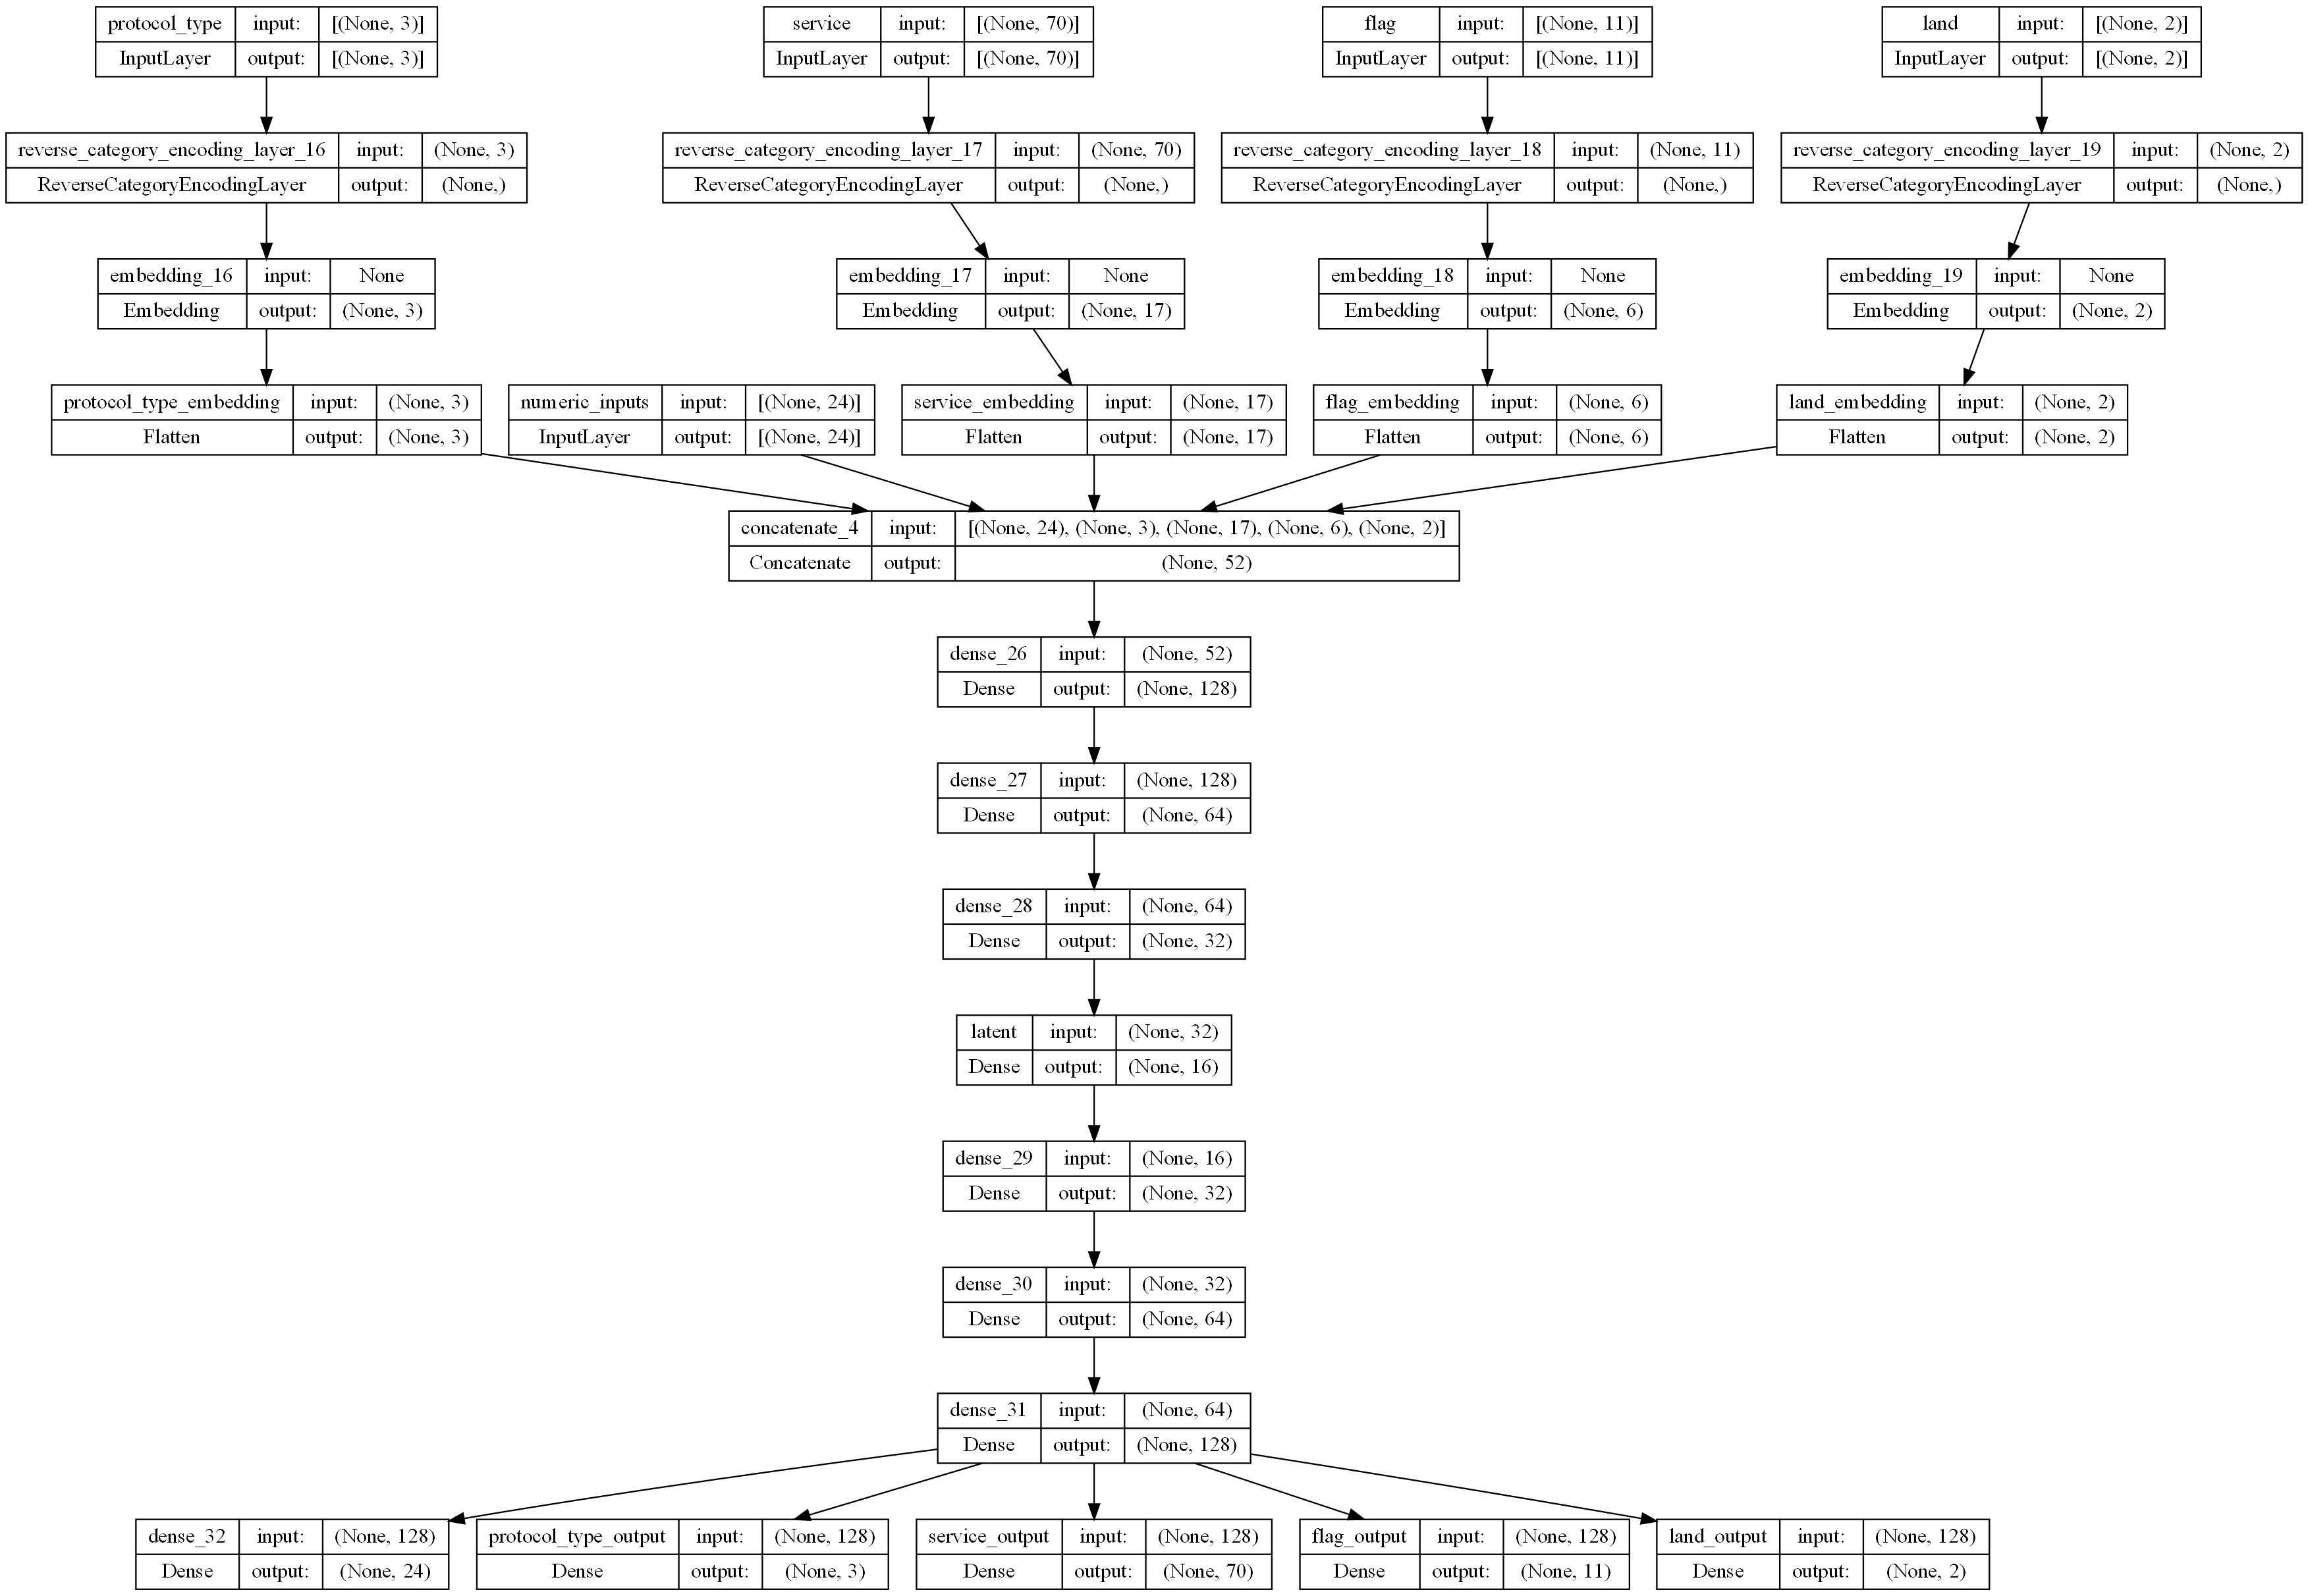

In [196]:
from keras.utils import plot_model

plot_model(model, to_file='anomaly detector.png', show_shapes=True, show_layer_names=True, dpi=166)

In [197]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(0.0001), loss='mse')

history = model.fit([X_train_numeric] + [X_train_cat_ohe[col] for col in X_train_cat.columns], [X_train_numeric] + [X_train_cat_ohe[col] for col in X_train_cat.columns], epochs=10, batch_size=64)

Epoch 1/10
964/964 [==============================] - 7s 5ms/step - loss: 0.2359 - dense_32_loss: 0.0603 - protocol_type_output_loss: 0.0732 - service_output_loss: 0.0092 - flag_output_loss: 0.0269 - land_output_loss: 0.0227
Epoch 2/10
964/964 [==============================] - 5s 5ms/step - loss: 0.0403 - dense_32_loss: 0.0167 - protocol_type_output_loss: 0.0068 - service_output_loss: 0.0054 - flag_output_loss: 0.0046 - land_output_loss: 1.2288e-04
Epoch 3/10
964/964 [==============================] - 5s 5ms/step - loss: 0.0243 - dense_32_loss: 0.0120 - protocol_type_output_loss: 9.4922e-04 - service_output_loss: 0.0048 - flag_output_loss: 0.0027 - land_output_loss: 9.9618e-05
Epoch 4/10
964/964 [==============================] - 5s 5ms/step - loss: 0.0189 - dense_32_loss: 0.0090 - protocol_type_output_loss: 3.0131e-04 - service_output_loss: 0.0042 - flag_output_loss: 0.0024 - land_output_loss: 9.8382e-05
Epoch 5/10
964/964 [==============================] - 5s 5ms/step - loss: 0.0162

In [198]:
def plot_history(history, metric: str):
	plt.plot(history.history[metric], label='train')
	# plt.plot(history.history[f'val_{metric}'], label='validation')
	plt.title(f'{metric.title()} of Model')
	plt.xlabel('Epoch')
	plt.ylabel(metric.title())
	plt.legend()
	plt.grid()
	plt.show()

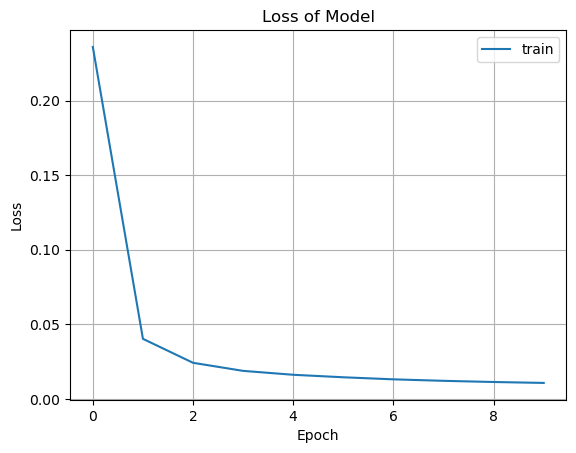

In [199]:
plot_history(history, 'loss')

In [200]:
encoder = Model(inputs=model.input, outputs=model.get_layer('latent').output)

In [201]:
X_train_encoded = encoder.predict([X_train_numeric] + [X_train_cat_ohe[col] for col in X_train_cat.columns])
X_test_encoded = encoder.predict([X_test_numeric] + [X_test_cat_ohe[col] for col in X_test_cat.columns])
X_encoded = encoder.predict([X_numeric] + [X_cat_ohe[col] for col in X_cat.columns])

4642/4642 [==============================] - 9s 2ms/step


In [202]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, novelty=True)

lof.fit(X_train_encoded)

LocalOutlierFactor(novelty=True)

In [203]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = y_test
y_pred = lof.predict(X_test_encoded)
y_pred[y_pred == -1] = 0

conf_matrix = confusion_matrix(y_true, y_pred)
display(pd.DataFrame(conf_matrix, index=attack_labels, columns=attack_labels))

print(classification_report(y_true, y_pred, target_names=attack_labels))

,abnormal,normal
abnormal,59217,12246
normal,1424,13987


              precision    recall  f1-score   support

    abnormal       0.98      0.83      0.90     71463
      normal       0.53      0.91      0.67     15411

    accuracy                           0.84     86874
   macro avg       0.75      0.87      0.78     86874
weighted avg       0.90      0.84      0.86     86874



In [206]:
model.save('anomaly_detector.keras')
encoder.save('encoder.keras')

In [207]:
import pickle
pickle.dump(scaler, open('AD_scaler.pkl', 'wb'))
pickle.dump(cat_input_codes, open('AD_cat_input_codes.pkl', 'wb'))
pickle.dump(lof, open('AD_lof.pkl', 'wb'))